In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:30<00:00, 35.3MB/s]
100% 1.06G/1.06G [00:30<00:00, 37.2MB/s]


In [23]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [25]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [26]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [27]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 109ms/step - loss: 1.0553 - accuracy: 0.6048 - val_loss: 0.6164 - val_accuracy: 0.6428
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5670 - accuracy: 0.7093 - val_loss: 0.5356 - val_accuracy: 0.7286
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4922 - accuracy: 0.7646 - val_loss: 0.5181 - val_accuracy: 0.7504
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4220 - accuracy: 0.8023 - val_loss: 0.4934 - val_accuracy: 0.7770
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3543 - accuracy: 0.8437 - val_loss: 0.5816 - val_accuracy: 0.7098
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2970 - accuracy: 0.8734 - val_loss: 0.4564 - val_accuracy: 0.7860
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2203 - accuracy: 0.9065 - val_loss: 0.4963 - val_ac

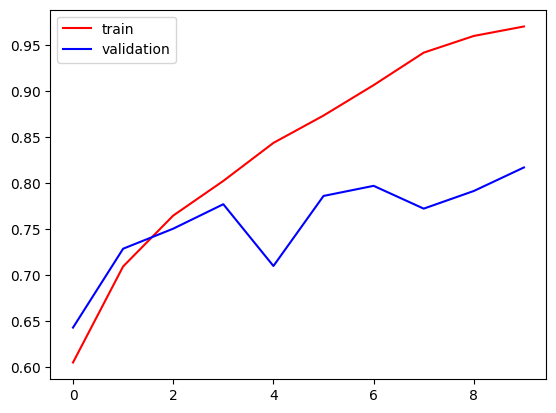

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

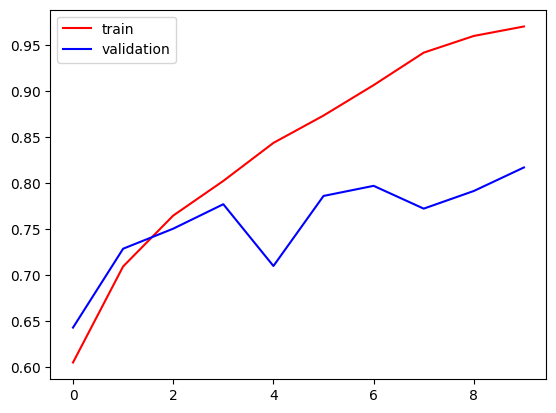

In [32]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

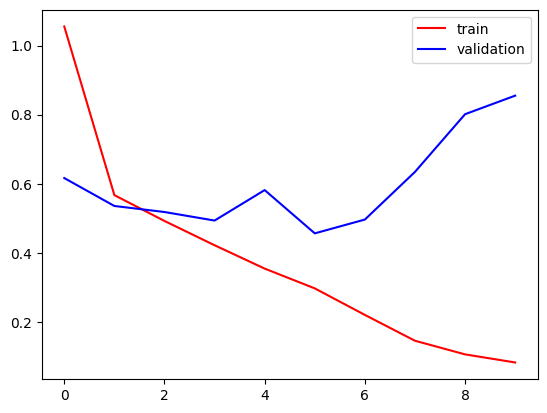

In [33]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

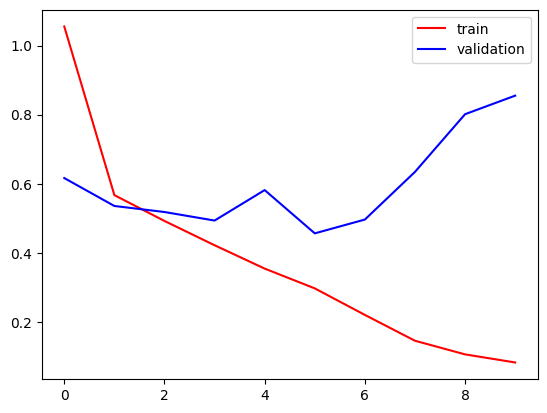

In [34]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [35]:
import cv2

In [36]:
test_img = cv2.imread('/content/dog.jpeg')

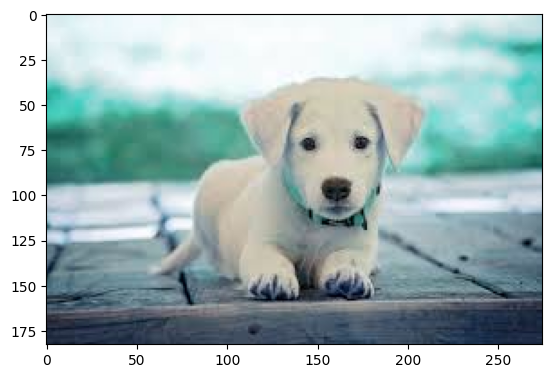

In [37]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [38]:
test_img.shape

(183, 275, 3)

In [39]:
test_img = cv2.resize(test_img,(256,256))

In [40]:
test_input = test_img.reshape((1,256,256,3))

In [41]:
model.predict(test_input)

1/1 [==============================] - 0s 137ms/step


array([[1.]], dtype=float32)